In [1]:
from astropy.table import Table  
import numpy as np

data_table = Table.read('/home/douglas/Gala-code/correctactions.fits', format = 'fits') 
print(data_table[1].columns)

<TableColumns names=('idx','Jr','Jphi','Jz','Theta_r','Theta_phi','Theta_z','Freq_r','Freq_phi','Freq_z')>


In [2]:
marchetti = Table.read('/home/douglas/data.fits', format = 'fits')
print(marchetti[1].columns)

<TableColumns names=('source_id','ra','dec','parallax','e_parallax','pmra','e_pmra','pmdec','e_pmdec','vrad','e_vrad','GMag','dist','el_dist','eu_dist','rGC','el_rGC','eu_rGC','RGC','el_RGC','eu_RGC','xGC','el_xGC','eu_xGC','yGC','el_yGC','eu_yGC','zGC','el_zGC','eu_zGC','U','el_U','eu_U','V','el_V','eu_V','W','el_W','eu_W','UW','el_UW','eu_UW','vR','el_vR','eu_vR','vtot','el_vtot','eu_vtot','P_ub')>


In [3]:
Jr = np.array(data_table["Jr"][:119629])
Jphi = np.array(data_table["Jphi"][:119629])
Jz = np.array(data_table["Jz"][:119629])
Or = np.array(data_table["Freq_r"][:119629])
Ophi = np.array(data_table["Freq_phi"][:119629])
Oz = np.array(data_table["Freq_z"][:119629])
idx = np.array(data_table["idx"][:119629])

In [4]:
X = []
Y = []
Z = []
U = []
V = []
W = []

for i in idx:
    X.append(marchetti["xGC"][i]*0.001)
    Y.append(marchetti["yGC"][i]*0.001)
    Z.append(marchetti["zGC"][i]*0.001)
    U.append(marchetti["U"][i])
    V.append(marchetti["V"][i])
    W.append(marchetti["W"][i])

X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)
U = np.array(U)
V = np.array(V)
W = np.array(W)

/home/douglas/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/douglas/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


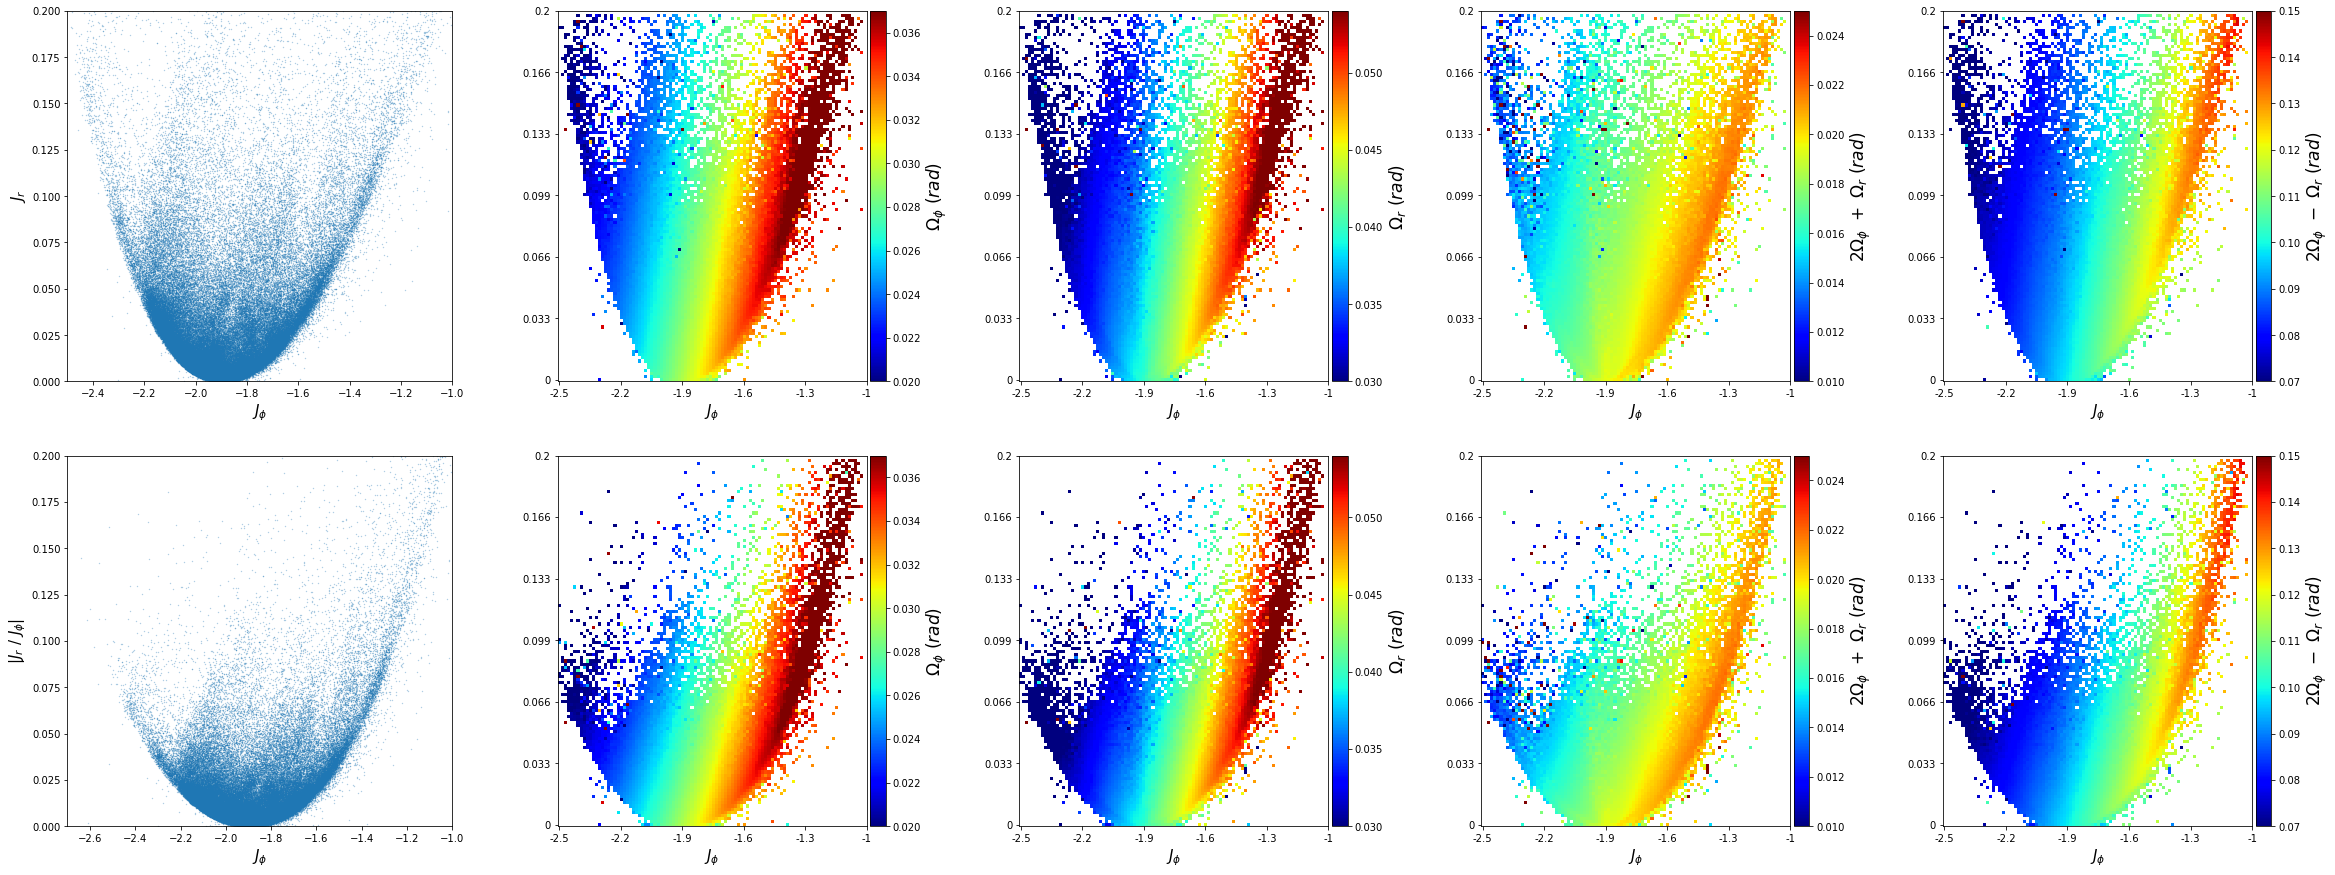

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig,axs = plt.subplots(2,5, figsize=(40,15))

axs[0, 0].scatter(Jphi, Jr, s=0.1, alpha=0.5)
axs[0, 0].axis([-2.5, -1, 0, 0.2])
axs[0, 0].set_xlabel("$J_{\phi}$",fontsize=15)
axs[0, 0].set_ylabel("$J_r$",fontsize=15)

axs[1, 0].scatter(Jphi,np.abs(Jr/Jphi),s=0.1, alpha=0.5)
axs[1, 0].axis([-2.7, -1, 0, 0.2])
axs[1, 0].set_xlabel("$J_{\phi}$",fontsize=15)
axs[1, 0].set_ylabel("$|J_r\ /\ J_{\phi}|$",fontsize=15)

for i in range (0,8):
    if i == 0:
        axx=0
        axy=1
        xmin = -2.5
        xmax = -1
        ymin = 0
        ymax = 0.2
        vmin = 0.020
        vmax = 0.037
        step = 0.0016667
        x = Jphi
        y = Jr
        w = Ophi
        ylabel = '$J_r\ (kpc^2/Myr)$'
        label = '$\Omega_{\phi}\ (rad)$'
    elif i == 1:
        axx = 1
        axy = 1
        y = np.abs(Jr/Jphi)
        ylabel = '$|J_r\ /\ J_{\phi}|$'
    elif i == 2:
        axx = 0
        axy = 2
        y = Jr
        vmin = 0.03
        vmax = 0.054
        w = Or
        ylabel = '$J_r\ (kpc^2/Myr)$'
        label = '$\Omega_{r}\ (rad)$'
    elif i == 3:
        axx = 1
        axy = 2
        y = np.abs(Jr/Jphi)
        w = Or
        ylabel = '$|J_r\ /\ J_{\phi}|$'
    elif i == 4:
        axx = 0
        axy = 3
        vmin = 0.01
        vmax = 0.025
        y = Jr
        w = 2*Ophi + Or
        ylabel = '$J_r\ (kpc^2/Myr)$'
        label = '$2\Omega_{\phi}\ +\ \Omega_{r}\ (rad)$'
    elif i == 5:
        axx = 1
        axy = 3
        y = np.abs(Jr/Jphi)
        w = 2*Ophi + Or
        ylabel = '$|J_r\ /\ J_{\phi}|$'
    elif i == 6:
        axx = 0
        axy = 4
        vmin = 0.07
        vmax = 0.15
        y = Jr
        w = 2*Ophi - Or
        ylabel = '$J_r\ (kpc^2/Myr)$'
        label = '$2\Omega_{\phi}\ -\ \Omega_{r}\ (rad)$'
    else:
        axx = 1
        axy = 4
        y = np.abs(Jr/Jphi)
        w = 2*Ophi - Or
        ylabel = '$|J_r\ /\ J_{\phi}|$'
    
    bin_x = np.arange(xmin,xmax, step=0.015)           ## 100
    bin_y = np.arange(ymin, ymax, step=step)          ## 120
    H, xed, yed = np.histogram2d(x, y, bins=(bin_x,bin_y))
    color_func = np.ndarray(shape=(len(yed)-1,len(xed)-1))
    
    for j in range(0, len(bin_x)-1):
        for k in range(0, len(bin_y)-1):
            ichoose = np.where( (x>bin_x[j]) & (x<bin_x[j+1]) 
                               & (y>bin_y[k]) & (y< bin_y[k+1]))

            color_func[k,j] = np.abs(np.median(w[ichoose]))

    ##############################################################################
    # Setting figure size and plotting mean_Vphi with colorbar. Selected v-values 
    # for ease of seing spiral. Actual range between 180 and 250.
    T = axs[axx,axy].imshow(color_func, cmap = 'jet',origin='lower',vmin = vmin ,vmax = vmax)
    divider = make_axes_locatable(axs[axx,axy])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    bar = plt.colorbar(T, cax=cax)

    ##############################################################################
    # Setting aspect as 100/120 (bin_x/bin_y) so the image is a square
    bar.set_label(label,size=17)
    axs[axx,axy].set_xlabel("$J_{\phi}$",fontsize=15)
    plt.setp(axs[axx,axy], xticks=[0, 20, 40, 60, 80, 100], xticklabels=['-2.5','-2.2','-1.9','-1.6','-1.3','-1'],
        yticks=[0, 20, 40, 60, 80, 100, 120], yticklabels=['0','0.033','0.066','0.099','0.133','0.166','0.2'])

/home/douglas/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/douglas/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


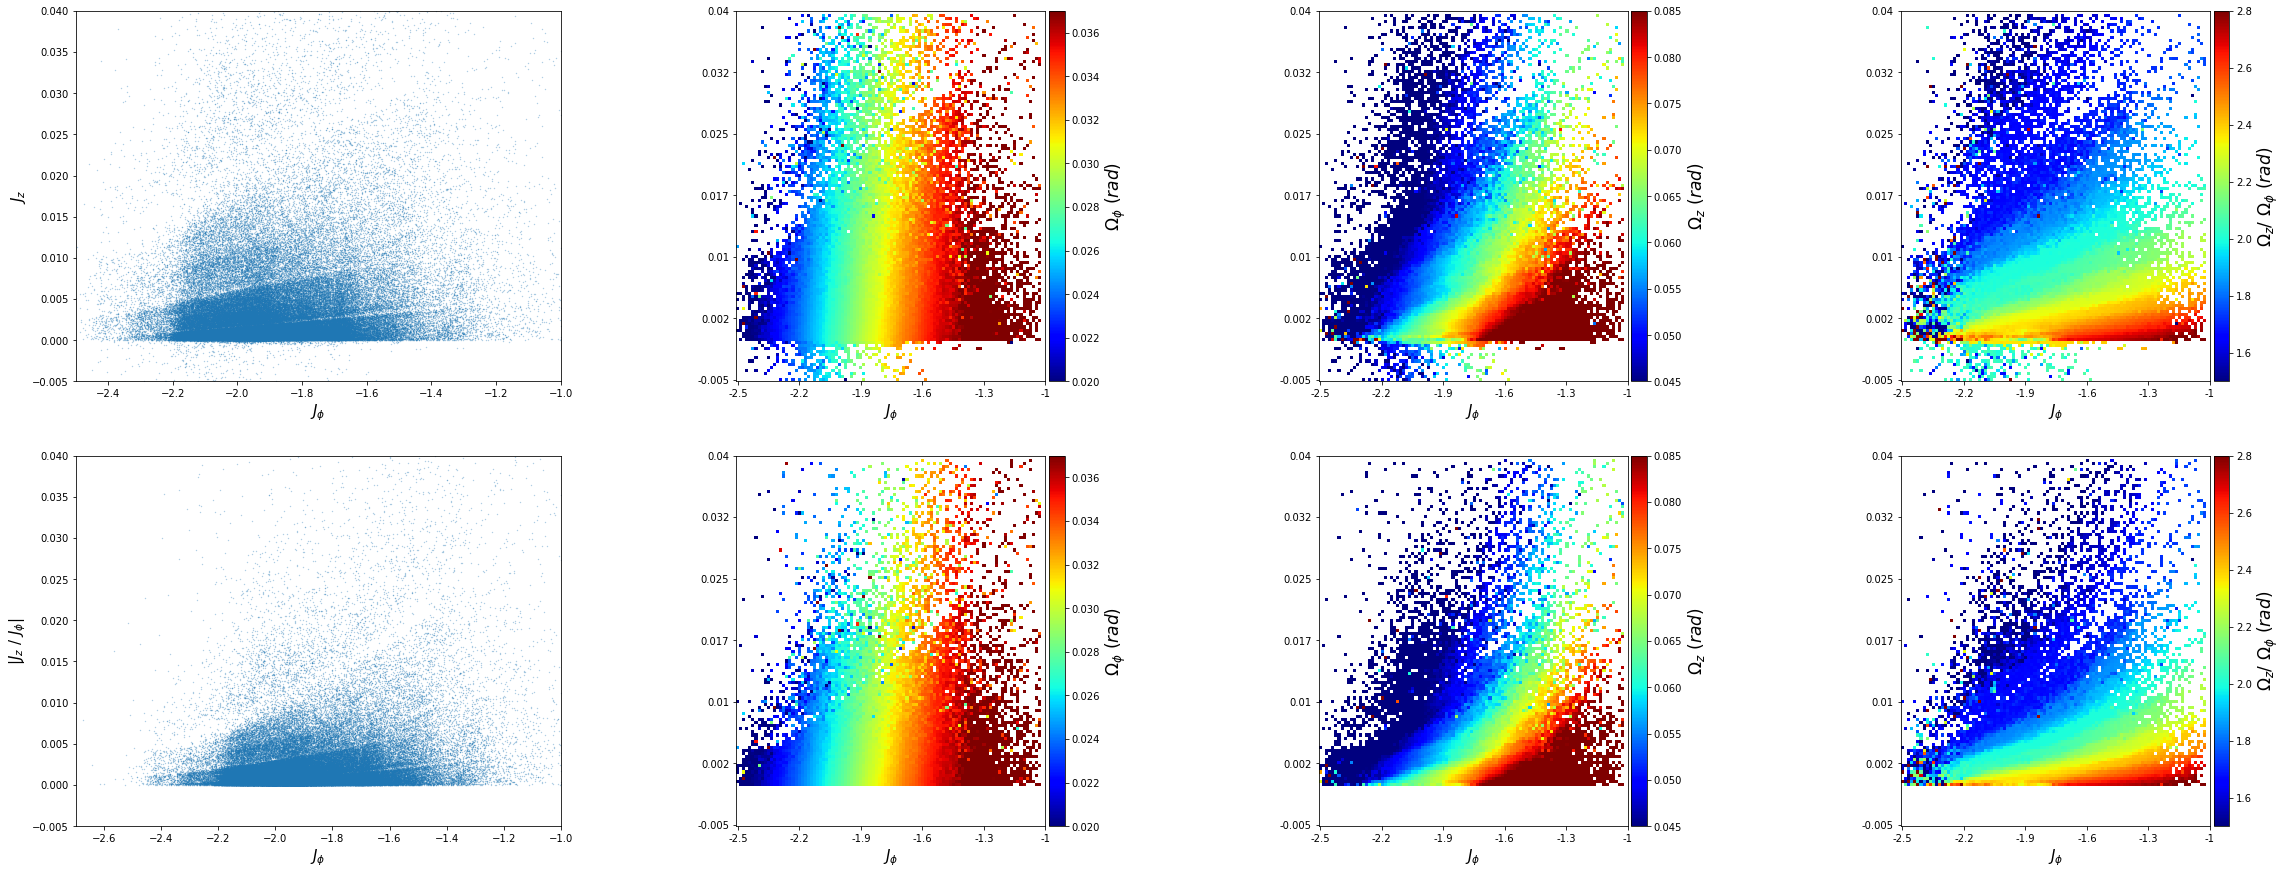

In [6]:
fig,axs = plt.subplots(2,4, figsize=(40,15))

axs[0, 0].scatter(Jphi, Jz, s=0.1, alpha=0.5)
axs[0, 0].axis([-2.5, -1, -0.005, 0.04])
axs[0, 0].set_xlabel("$J_{\phi}$",fontsize=15)
axs[0, 0].set_ylabel("$J_z$",fontsize=15)

axs[1, 0].scatter(Jphi,np.abs(Jz/Jphi),s=0.1, alpha=0.5)
axs[1, 0].axis([-2.7, -1, -0.005, 0.04])
axs[1, 0].set_xlabel("$J_{\phi}$",fontsize=15)
axs[1, 0].set_ylabel("$|J_z\ /\ J_{\phi}|$",fontsize=15)

for i in range (0,6):
    if i == 0:
        axx=0
        axy=1
        xmin = -2.5
        xmax = -1
        vmin = 0.020
        vmax = 0.037
        ymin = -0.005
        ymax = 0.04
        step = 0.000375
        x = Jphi
        y = Jz
        w = Ophi 
        ylabel = '$J_z\ (kpc^2/Myr)$'
        label = '$\Omega_{\phi}\ (rad)$'
    elif i == 1:
        axx = 1
        axy = 1
        y = np.abs(Jz/Jphi)
    elif i == 2:
        axx = 0
        axy = 2
        y = Jz
        vmin = 0.045
        vmax = 0.085
        w = Oz
        label = '$\Omega_{z}\ (rad)$'
    elif i == 3:
        axx = 1
        axy = 2
        y = np.abs(Jz/Jphi)
    elif i == 4:
        axx = 0
        axy = 3
        vmin = 1.5
        vmax = 2.8
        y = Jz
        w = Oz/Ophi
        label = '$\Omega_{z}/\ \Omega_{\phi}\ (rad)$'
    else:
        axx = 1
        axy = 3
        y = np.abs(Jz/Jphi)
        w = Oz/Ophi
        ylabel = '$|J_z\ /\ J_{\phi}|$'
   
    bin_x = np.arange(xmin,xmax, step=0.015)           ## 100
    bin_y = np.arange(ymin, ymax, step=step)          ## 120
    H, xed, yed = np.histogram2d(x, y, bins=(bin_x,bin_y))
    color_func = np.ndarray(shape=(len(yed)-1,len(xed)-1))
    
    for j in range(0, len(bin_x)-1):
        for k in range(0, len(bin_y)-1):
            ichoose = np.where( (x>bin_x[j]) & (x<bin_x[j+1]) 
                               & (y>bin_y[k]) & (y< bin_y[k+1]))

            color_func[k,j] = np.abs(np.median(w[ichoose]))

    ##############################################################################
    # Setting figure size and plotting mean_Vphi with colorbar. Selected v-values 
    # for ease of seing spiral. Actual range between 180 and 250.
    T = axs[axx,axy].imshow(color_func, cmap = 'jet',origin='lower',vmin = vmin ,vmax = vmax)
    divider = make_axes_locatable(axs[axx,axy])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    bar = plt.colorbar(T, cax=cax)

    ##############################################################################
    # Setting aspect as 100/120 (bin_x/bin_y) so the image is a square
    bar.set_label(label,size=17)
    axs[axx,axy].set_xlabel("$J_{\phi}$",fontsize=15)
    plt.setp(axs[axx,axy], xticks=[0, 20, 40, 60, 80, 100], xticklabels=['-2.5','-2.2','-1.9','-1.6','-1.3','-1'],
        yticks=[0, 20, 40, 60, 80, 100, 120], yticklabels=['-0.005','0.002','0.01','0.017','0.025','0.032','0.04'])

Text(0.5,0,'$|J_{\\phi}|$')

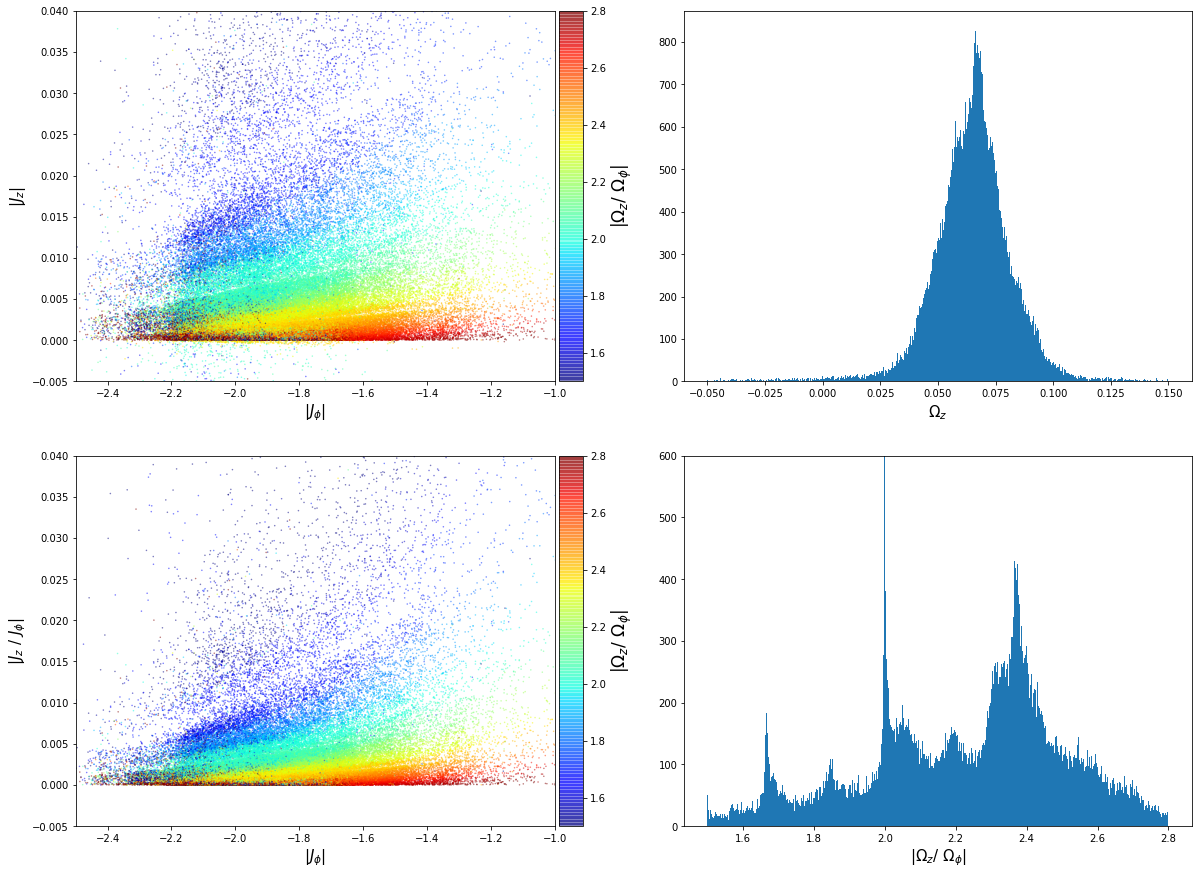

In [35]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig,axs = plt.subplots(2,2, figsize=(20,15))

axs[0, 1].hist(Oz,bins=1000,range=(-0.05,0.15))
axs[0, 1].set_xlabel('$\Omega_z$',fontsize=15)

axs[1, 1].hist(np.abs(Oz/Ophi), bins=1000, range=(1.5,2.8))
axs[1, 1].set_xlabel('$|\Omega_z/\ \Omega_{\phi}|$',fontsize=15)
axs[1, 1].set_ylim(0,600)

color=np.abs(Oz/Ophi)

T = axs[0, 0].scatter(Jphi, Jz, c=color, cmap='jet',vmin=1.5,vmax=2.8, s=0.3, alpha=0.5)
divider = make_axes_locatable(axs[0,0])
cax = divider.append_axes("right", size="5%", pad=0.05)
bar = plt.colorbar(T, cax=cax)
bar.set_label('$|\Omega_{z}/\ \Omega_{\phi}|$',size=17)
axs[0,0].axis([-2.5, -1, -0.005, 0.04])
axs[0,0].set_ylabel("$|J_z|$",fontsize=15)
axs[0,0].set_xlabel("$|J_{\phi}|$",fontsize=15)

T = axs[1, 0].scatter(Jphi, np.abs(Jz/Jphi), c=color, cmap='jet',vmin=1.5,vmax=2.8, s=0.3, alpha=0.5)
divider = make_axes_locatable(axs[1,0])
cax = divider.append_axes("right", size="5%", pad=0.05)
bar = plt.colorbar(T, cax=cax)
bar.set_label('$|\Omega_{z}/\ \Omega_{\phi}|$',size=17)
axs[1,0].axis([-2.5, -1, -0.005, 0.04])
axs[1,0].set_ylabel("$|J_z\ /\ J_{\phi}|$",fontsize=15)
axs[1,0].set_xlabel("$|J_{\phi}|$",fontsize=15)